In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pathlib import Path


import sys
sys.path.insert(0, "/home/estengel/ambiguous_parsing/src/")
from ambiguous_parsing.eval.eval import get_df

In [2]:
CHECKPOINT_DIR= Path("/brtx/602-nvme1/estengel/ambiguous_parsing/logs/1.0/") 
# fol
fol_models_and_paths = [
    ("codegen-350M", "codegen-350M_lamp_no_context_all_50-50-5k-train-100-perc-ambig_fol_fewshot_2_test_eval_constrained_bs_5_np_10/"),
    ("codegen-2B", "codegen-2B_lamp_no_context_all_50-50-5k-train-100-perc-ambig_fol_fewshot_2_test_eval_constrained_bs_5_np_10/"),
    ("codegen-6B", "codegen-6B_lamp_no_context_all_50-50-5k-train-100-perc-ambig_fol_fewshot_2_test_eval_constrained_bs_5_np_10/"),
    ("codegen-16B", "codegen-16B_lamp_no_context_all_50-50-5k-train-100-perc-ambig_fol_fewshot_2_test_eval_constrained_bs_5_np_10/")
]

lisp_models_and_paths = [
    ("codegen-350M", "codegen-350M_lamp_no_context_all_50-50-5k-train-100-perc-ambig_lisp_fewshot_2_test_eval_constrained_bs_5_np_10/"),
    ("codegen-2B", "codegen-2B_lamp_no_context_all_50-50-5k-train-100-perc-ambig_lisp_fewshot_2_test_eval_constrained_bs_5_np_10/"),
    ("codegen-6B", "codegen-6B_lamp_no_context_all_50-50-5k-train-100-perc-ambig_lisp_fewshot_2_test_eval_constrained_bs_5_np_10/"),
    ("codegen-16B", "codegen-16B_lamp_no_context_all_50-50-5k-train-100-perc-ambig_lisp_fewshot_2_test_eval_constrained_bs_5_np_10/")
]







In [3]:
# fol data 
model_order = ['codegen-350M', 'codegen-2B', 'codegen-6B', 'codegen-16B']
fol_test_path = "/brtx/602-nvme1/estengel/ambiguous_parsing/data/raw/50-50-5k-train-100-perc-ambig_fol/test.jsonl"
fol_eval_path = "/brtx/602-nvme1/estengel/ambiguous_parsing/data/raw/50-50-5k-train-100-perc-ambig_fol/test_eval.jsonl"
big_df = []
for model_name, path in fol_models_and_paths:
    pred_path = CHECKPOINT_DIR / path
    try:
        df = get_df(fol_test_path, fol_eval_path, pred_path, is_fol=True)
        df['model'] = model_name
        df['model_order'] = model_order.index(model_name)
        df['is_fol'] = True
        big_df.append(df)
    except FileNotFoundError:
        print(f"Skipping {model_name}")
        continue

# lisp data 
lisp_test_path = "/brtx/602-nvme1/estengel/ambiguous_parsing/data/raw/50-50-5k-train-100-perc-ambig_lisp/test.jsonl"
lisp_eval_path = "/brtx/602-nvme1/estengel/ambiguous_parsing/data/raw/50-50-5k-train-100-perc-ambig_lisp/test_eval.jsonl"
for model_name, path in lisp_models_and_paths:
    pred_path = CHECKPOINT_DIR / path
    try:
        df = get_df(lisp_test_path, lisp_eval_path, pred_path, is_fol=False)
        df['model'] = model_name
        df['model_order'] = model_order.index(model_name)
        df['is_fol'] = False
        big_df.append(df)
    except FileNotFoundError:
        print(f"Skipping {model_name}")
        continue

big_df = pd.concat(big_df)

0 = 0.00 are missing a first output
2 = 0.40 are missing a second output
0 = 0.00 are missing a first output
0 = 0.00 are missing a second output
2 = 0.40 are missing a first output
2 = 0.40 are missing a second output
0 = 0.00 are missing a first output
1 = 0.20 are missing a second output
3 = 0.60 are missing a first output
3 = 0.60 are missing a second output
0 = 0.00 are missing a first output
1 = 0.20 are missing a second output
1 = 0.20 are missing a first output
3 = 0.60 are missing a second output
1 = 0.20 are missing a first output
7 = 1.40 are missing a second output


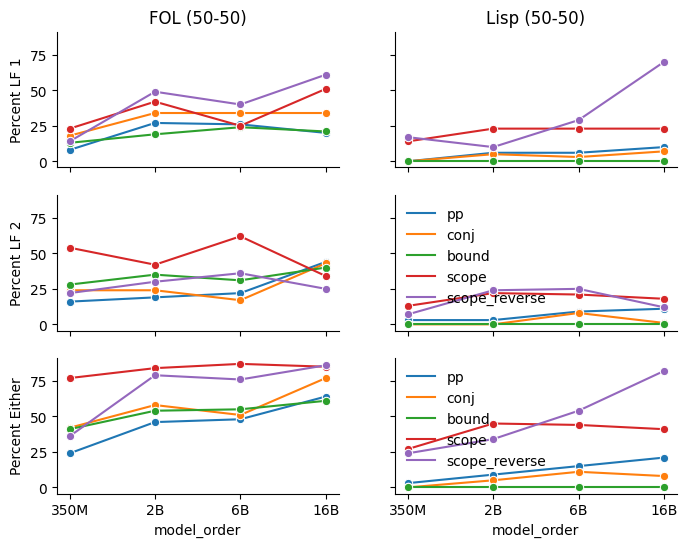

In [4]:
short_models = [x.split("-")[1] for x in model_order]

fig, ax = plt.subplots(3, 2, figsize=(8, 6), sharex=True, sharey=True)
fol_df = big_df[big_df['is_fol'] == True]
fol_df_match_lf_1 = fol_df[fol_df['key'] == "pred_top_1_matches_lf_0"]
fol_df_match_lf_2 = fol_df[fol_df['key'] == "pred_top_1_matches_lf_1"]
fol_df_match_lf_3 = fol_df[fol_df['key'] == "pred_top_1_matches_either"]

# fol 
sns.lineplot(data = fol_df_match_lf_1, x = "model_order", y = "value", hue = "type", ax=ax[0,0], marker='o')
sns.lineplot(data = fol_df_match_lf_2, x = "model_order", y = "value", hue = "type", ax=ax[1,0], marker='o')
sns.lineplot(data = fol_df_match_lf_3, x = "model_order", y = "value", hue = "type", ax=ax[2,0], marker='o')

ax[0,0].set_title("FOL (50-50)")
ax[0,0].set_yticks([0, 25, 50, 75, 100])
ax[1,0].set_yticks([0, 25, 50, 75, 100])
ax[2,0].set_yticks([0, 25, 50, 75, 100])
ax[1,0].set_xticks(range(len(model_order)), labels = short_models)
ax[1,0].set_xlabel("Model")
ax[0,0].set_ylabel("Percent LF 1")
ax[1,0].set_ylabel("Percent LF 2")
ax[2,0].set_ylabel("Percent Either")
ax[0,0].legend().remove()
ax[1,0].legend().remove()
ax[2,0].legend().remove()

# lisp 
lisp_df = big_df[big_df['is_fol'] == False]
lisp_df_match_lf_1 = lisp_df[lisp_df['key'] == "pred_top_1_matches_lf_0"]
lisp_df_match_lf_2 = lisp_df[lisp_df['key'] == "pred_top_1_matches_lf_1"]
lisp_df_match_lf_3 = lisp_df[lisp_df['key'] == "pred_top_1_matches_either"]

sns.lineplot(data = lisp_df_match_lf_1, x = "model_order", y = "value", hue = "type", ax=ax[0,1], marker = "o")
sns.lineplot(data = lisp_df_match_lf_2, x = "model_order", y = "value", hue = "type", ax=ax[1,1], marker = "o")
sns.lineplot(data = lisp_df_match_lf_3, x = "model_order", y = "value", hue = "type", ax=ax[2,1], marker = "o")

ax[0,1].set_title("Lisp (50-50)")
ax[0,1].legend().remove()
ax[1,1].legend(frameon=False)
ax[2,1].legend(frameon=False)
ax[1,1].set_xticks(range(len(model_order)), labels = short_models)
ax[1,1].set_xlabel("Model")
sns.despine()




In [5]:



fol_models_and_paths = [
    ("0-100", "codegen-2B_lamp_no_context_all_0-100-5k-train-100-perc-ambig_fol_fewshot_2_test_eval_constrained_bs_5_np_10/"),
    ("10-90", "codegen-2B_lamp_no_context_all_10-90-5k-train-100-perc-ambig_fol_fewshot_2_test_eval_constrained_bs_5_np_10/"),
    ("20-80", "codegen-2B_lamp_no_context_all_20-80-5k-train-100-perc-ambig_fol_fewshot_2_test_eval_constrained_bs_5_np_10/"),
    ("30-70", "codegen-2B_lamp_no_context_all_30-70-5k-train-100-perc-ambig_fol_fewshot_2_test_eval_constrained_bs_5_np_10/"),
    ("40-60", "codegen-2B_lamp_no_context_all_40-60-5k-train-100-perc-ambig_fol_fewshot_2_test_eval_constrained_bs_5_np_10/"),
    ("50-50", "codegen-2B_lamp_no_context_all_50-50-5k-train-100-perc-ambig_fol_fewshot_2_test_eval_constrained_bs_5_np_10/"),
    ("60-40", "codegen-2B_lamp_no_context_all_60-40-5k-train-100-perc-ambig_fol_fewshot_2_test_eval_constrained_bs_5_np_10/"),
    ("70-30", "codegen-2B_lamp_no_context_all_70-30-5k-train-100-perc-ambig_fol_fewshot_2_test_eval_constrained_bs_5_np_10/"),
    ("80-20", "codegen-2B_lamp_no_context_all_80-20-5k-train-100-perc-ambig_fol_fewshot_2_test_eval_constrained_bs_5_np_10/"),
    ("90-10", "codegen-2B_lamp_no_context_all_90-10-5k-train-100-perc-ambig_fol_fewshot_2_test_eval_constrained_bs_5_np_10/"),
    ("100-0", "codegen-2B_lamp_no_context_all_100-0-5k-train-100-perc-ambig_fol_fewshot_2_test_eval_constrained_bs_5_np_10/"),
]

In [6]:

fol_test_path = "/brtx/602-nvme1/estengel/ambiguous_parsing/data/raw/50-50-5k-train-100-perc-ambig_fol/test.jsonl"
fol_eval_path = "/brtx/602-nvme1/estengel/ambiguous_parsing/data/raw/50-50-5k-train-100-perc-ambig_fol/test_eval.jsonl"
big_df = []
for model_name, path in fol_models_and_paths:
    pred_path = CHECKPOINT_DIR / path
    ratio = int(model_name.split("-")[0])
    try:
        df = get_df(fol_test_path, fol_eval_path, pred_path, is_fol=True)
        df['ratio'] = ratio
        df['is_fol'] = True
        big_df.append(df)
    except FileNotFoundError:
        print(f"Skipping {model_name}")
        continue

big_df = pd.concat(big_df)

0 = 0.00 are missing a first output
0 = 0.00 are missing a second output
0 = 0.00 are missing a first output
0 = 0.00 are missing a second output
0 = 0.00 are missing a first output
0 = 0.00 are missing a second output
0 = 0.00 are missing a first output
0 = 0.00 are missing a second output
0 = 0.00 are missing a first output
0 = 0.00 are missing a second output
0 = 0.00 are missing a first output
0 = 0.00 are missing a second output
1 = 0.20 are missing a first output
1 = 0.20 are missing a second output
1 = 0.20 are missing a first output
2 = 0.40 are missing a second output
2 = 0.40 are missing a first output
3 = 0.60 are missing a second output
2 = 0.40 are missing a first output
4 = 0.80 are missing a second output
2 = 0.40 are missing a first output
4 = 0.80 are missing a second output


Text(0, 0.5, 'Accuracy')

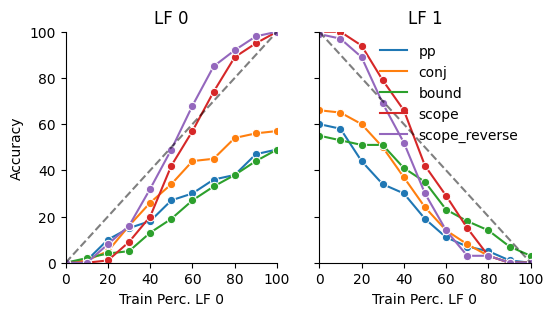

In [7]:

fig, ax = plt.subplots(1, 2, figsize=(6, 3), sharex=True, sharey=True)
fol_df = big_df[big_df['is_fol'] == True]
fol_df_match_lf_0 = fol_df[fol_df['key'] == "pred_top_1_matches_lf_0"]
fol_df_match_lf_1 = fol_df[fol_df['key'] == "pred_top_1_matches_lf_1"]

sns.lineplot(data = fol_df_match_lf_0, x = "ratio", y = "value", hue = "type", ax=ax[0], marker='o')
sns.lineplot(data = fol_df_match_lf_1, x = "ratio", y = "value", hue = "type", ax=ax[1], marker='o')
ax[0].legend().remove()
ax[1].legend(frameon=False)
sns.despine()
ax[0].set_xlim(0, 100)
ax[0].set_ylim(0, 100)

increasing_line_xs = np.linspace(0, 100)
increasing_line_ys = np.linspace(0, 100)
ax[0].plot(increasing_line_xs, increasing_line_ys, linestyle='--', color='black', alpha=0.5)
ax[0].set_title("LF 0")
decreasing_line_xs = np.linspace(0, 100)
decreasing_line_ys = np.linspace(100, 0)
ax[1].plot(decreasing_line_xs, decreasing_line_ys, linestyle='--', color='black', alpha=0.5)
ax[1].set_title("LF 1")

ax[0].set_xlabel("Train Perc. LF 0")
ax[1].set_xlabel("Train Perc. LF 0")
ax[0].set_ylabel("Accuracy")


In [ ]:

from ambiguous_parsing.metrics.fewshot_metrics import FewshotDatasetMetric





